In [2]:
from __future__ import absolute_import, division, print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append("../gym-sepsis/")
import gym_sepsis
from gym_sepsis.envs.sepsis_env import SepsisEnv
from gym_sepsis.envs.sepsis_env_bayesian import SepsisEnvBayesian


In [3]:
data = np.load("/Users/amir/code/stanford/cs221/project/processed_data.npz")
df = pd.read_csv("/Users/amir/Downloads/test_state_action_reward_df.csv")

In [4]:
sepsis_env = SepsisEnv()
sepsis_env_baysian = SepsisEnvBayesian()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


In [5]:
x = data['x_test']
y = data['y_test']

In [6]:
columns = ['ALBUMIN', 'ANION GAP', 'BANDS', 'BICARBONATE',
       'BILIRUBIN', 'BUN', 'CHLORIDE', 'CREATININE', 'DiasBP', 'Glucose',
       'GLUCOSE', 'HeartRate', 'HEMATOCRIT', 'HEMOGLOBIN', 'INR', 'LACTATE',
       'MeanBP', 'PaCO2', 'PLATELET', 'POTASSIUM', 'PT', 'PTT', 'RespRate',
       'SODIUM', 'SpO2', 'SysBP', 'TempC', 'WBC', 'age', 'is_male',
       'race_white', 'race_black', 'race_hispanic', 'race_other', 'height',
       'weight', 'vent', 'sofa', 'lods', 'sirs', 'qsofa', 'qsofa_sysbp_score',
       'qsofa_gcs_score', 'qsofa_resprate_score', 'elixhauser_hospital',
       'blood_culture_positive']


In [7]:
episodes = df.groupby(["subject_id","hadm_id","icustay_id"])
len(df)

39232

In [38]:
subject_id = None
hadm_id = None
icustay_id = None

episodes = df.groupby(["subject_id","hadm_id","icustay_id"])

simulated_episodes = []
rewards = []

squared_sums = 0

counter = 1

simulated_episode_rnn_count = 0
simulated_episode_mdn_count = 0
episode_count = 0

simulated_episode_rnn_sum = np.zeros(46)
simulated_episode_mdn_sum = np.zeros(46)
episode_sum = np.zeros(46)

for name, episode in episodes:
    # for each episode, play it back on it simulator
    episode_vals = episode.values
        
    episode_sum = episode_sum + np.sum(np.array(episode[columns].values[:46]), axis=0)
    
    episode_count = episode_count + len(actions)
    actions = episode_vals[:,list(episode.columns).index("discrete_action")]
    starting_state = np.array(episode.iloc[0][columns].values[:46])

    sepsis_env.reset(starting_state=starting_state)
    sepsis_env_baysian.reset(starting_state=starting_state)
    
    if counter %200 == 0:
        print("done with %f of episodes..." % (counter/len(episodes)))

    counter +=1
    simulated_episode_rnn_sum = simulated_episode_rnn_sum + starting_state.reshape(46)
    simulated_episode_rnn_count += 1
    done = False
    for action in actions:
        if not done:
            state, reward, done, _ = sepsis_env.step(action)
            simulated_episode_rnn_sum = simulated_episode_rnn_sum + state.reshape(46)
            simulated_episode_rnn_count += 1

            
    simulated_episode_mdn_sum = simulated_episode_mdn_sum + starting_state.reshape(46)
    simulated_episode_mdn_count += 1
    done = False
    for action in actions:
        if not done:
            state, reward, done, _ = sepsis_env_baysian.step(action)
            simulated_episode_mdn_sum = simulated_episode_mdn_sum + state.reshape(46)
            simulated_episode_mdn_count += 1

print (simulated_episode_rnn_sum.shape)
print (simulated_episode_mdn_sum.shape)
print (episode_sum.shape)

print(episode_count)
print(simulated_episode_mdn_count)
print(simulated_episode_rnn_count)

done with 0.058445 of episodes...
done with 0.116891 of episodes...
done with 0.175336 of episodes...
done with 0.233781 of episodes...
done with 0.292227 of episodes...
done with 0.350672 of episodes...
done with 0.409117 of episodes...
done with 0.467563 of episodes...
done with 0.526008 of episodes...
done with 0.584454 of episodes...
done with 0.642899 of episodes...
done with 0.701344 of episodes...
done with 0.759790 of episodes...
done with 0.818235 of episodes...
done with 0.876680 of episodes...
done with 0.935126 of episodes...
done with 0.993571 of episodes...
(46,)
(46,)
(46,)
39236
33195
33317


In [40]:
simulated_episode_rnn_mean = simulated_episode_rnn_sum/simulated_episode_rnn_count
simulated_episode_mdn_mean = simulated_episode_mdn_sum/simulated_episode_mdn_count
episode_mean = episode_sum /episode_count

Text(0.5, 1.0, 'Normalized Mean Across Features(Truth)')

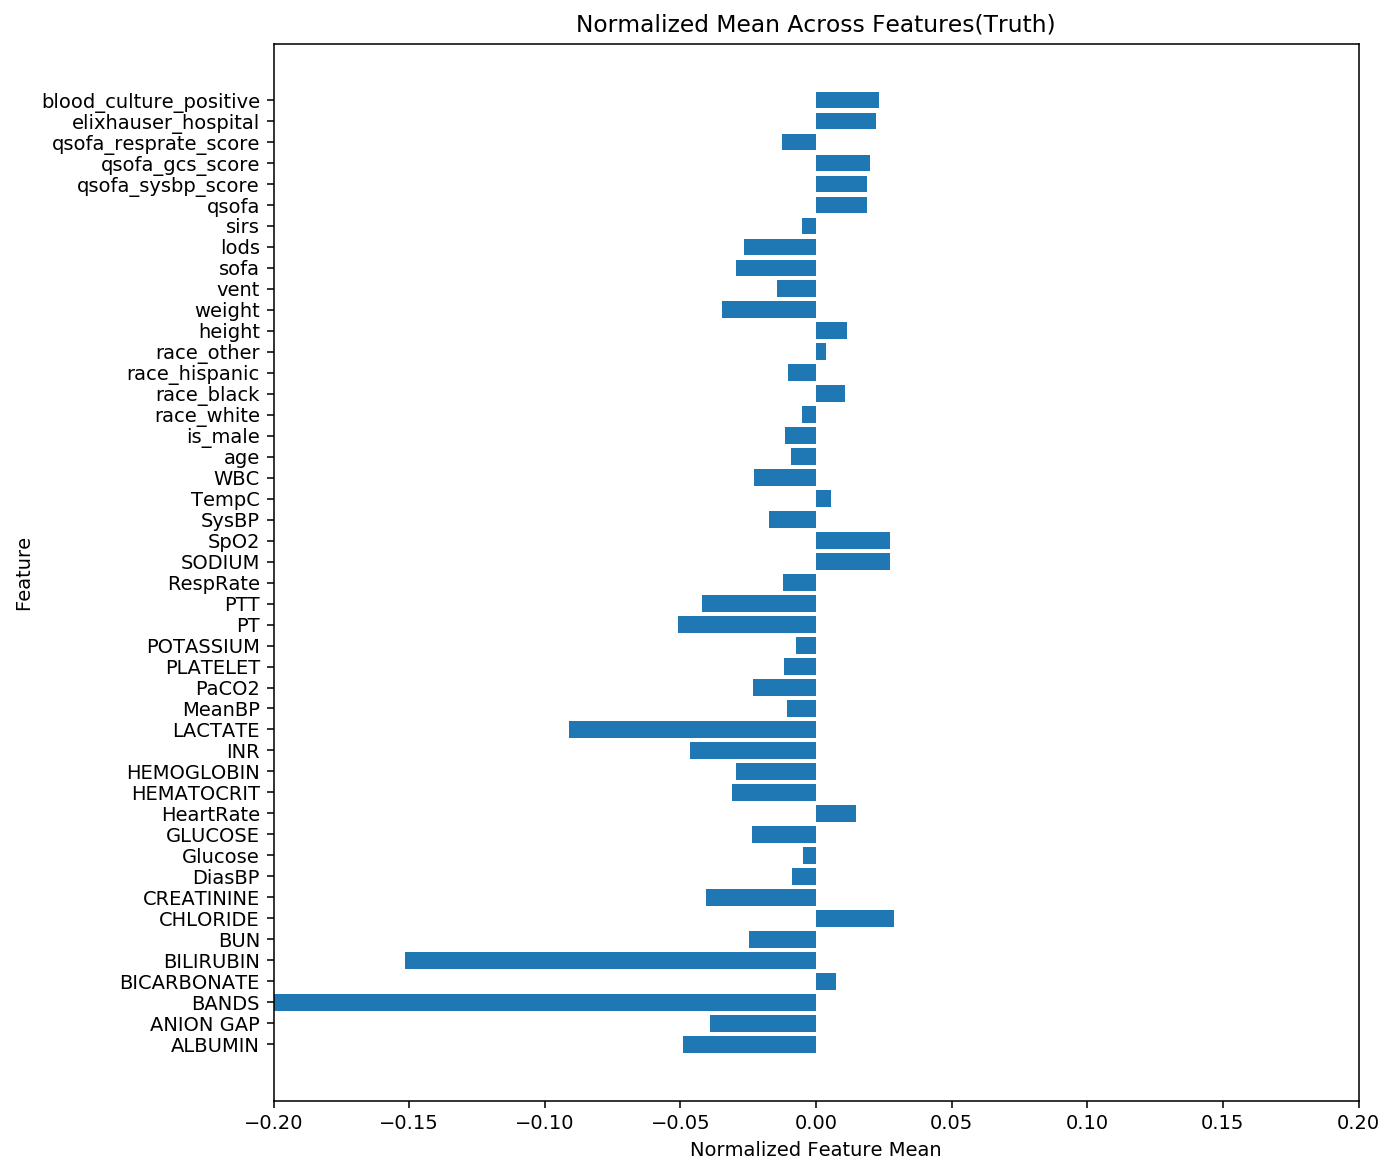

In [46]:
normalized_squared_sums = episode_mean
labels = [x for _,x in zip(normalized_squared_sums, columns)]
pos = np.arange(len(labels))
plt.figure(num=None, figsize=(10, 10), dpi=140)
plt.barh(width=normalized_squared_sums, y=pos)
plt.yticks(pos, labels)
plt.xlabel('Normalized Feature Mean')
plt.xlim(-.2, .2)
plt.ylabel('Feature')
plt.title('Normalized Mean Across Features(Truth)')

Text(0.5, 1.0, 'Normalized Mean Across Features(RNN)')

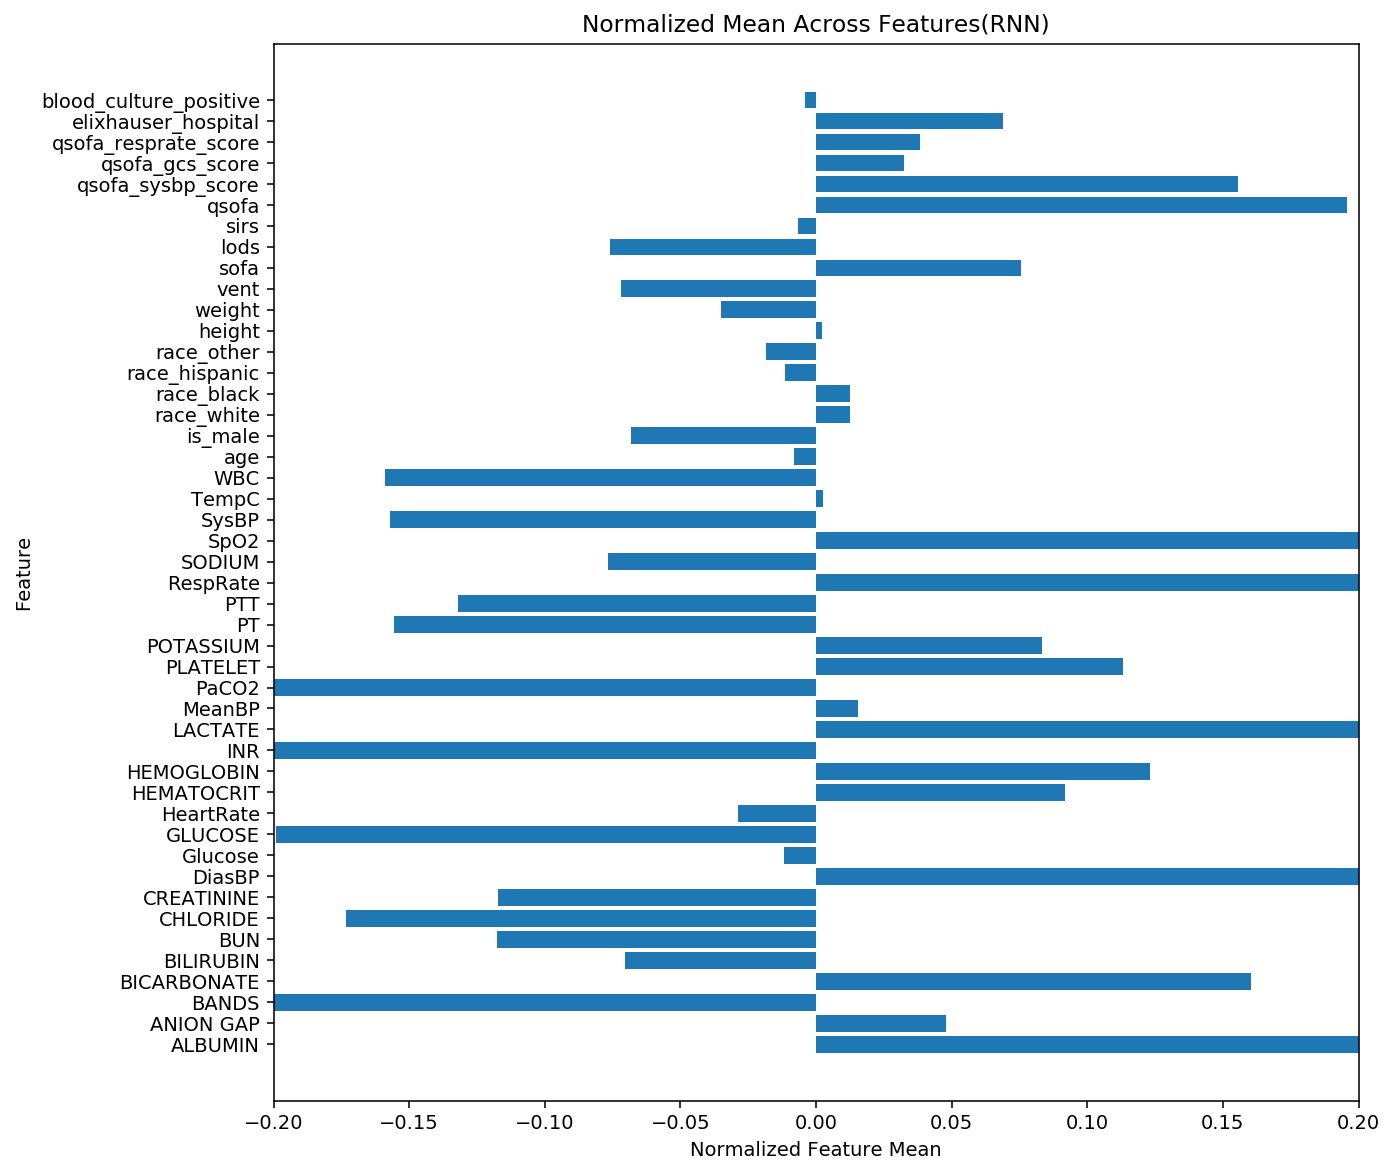

In [47]:
normalized_squared_sums = simulated_episode_rnn_mean
labels = [x for _,x in zip(normalized_squared_sums, columns)]
pos = np.arange(len(labels))
plt.figure(num=None, figsize=(10, 10), dpi=140)
plt.barh(width=normalized_squared_sums, y=pos)
plt.yticks(pos, labels)
plt.xlabel('Normalized Feature Mean')
plt.xlim(-.2, .2)
plt.ylabel('Feature')
plt.title('Normalized Mean Across Features(RNN)')

Text(0.5, 1.0, 'Normalized Mean Across Features(MDN)')

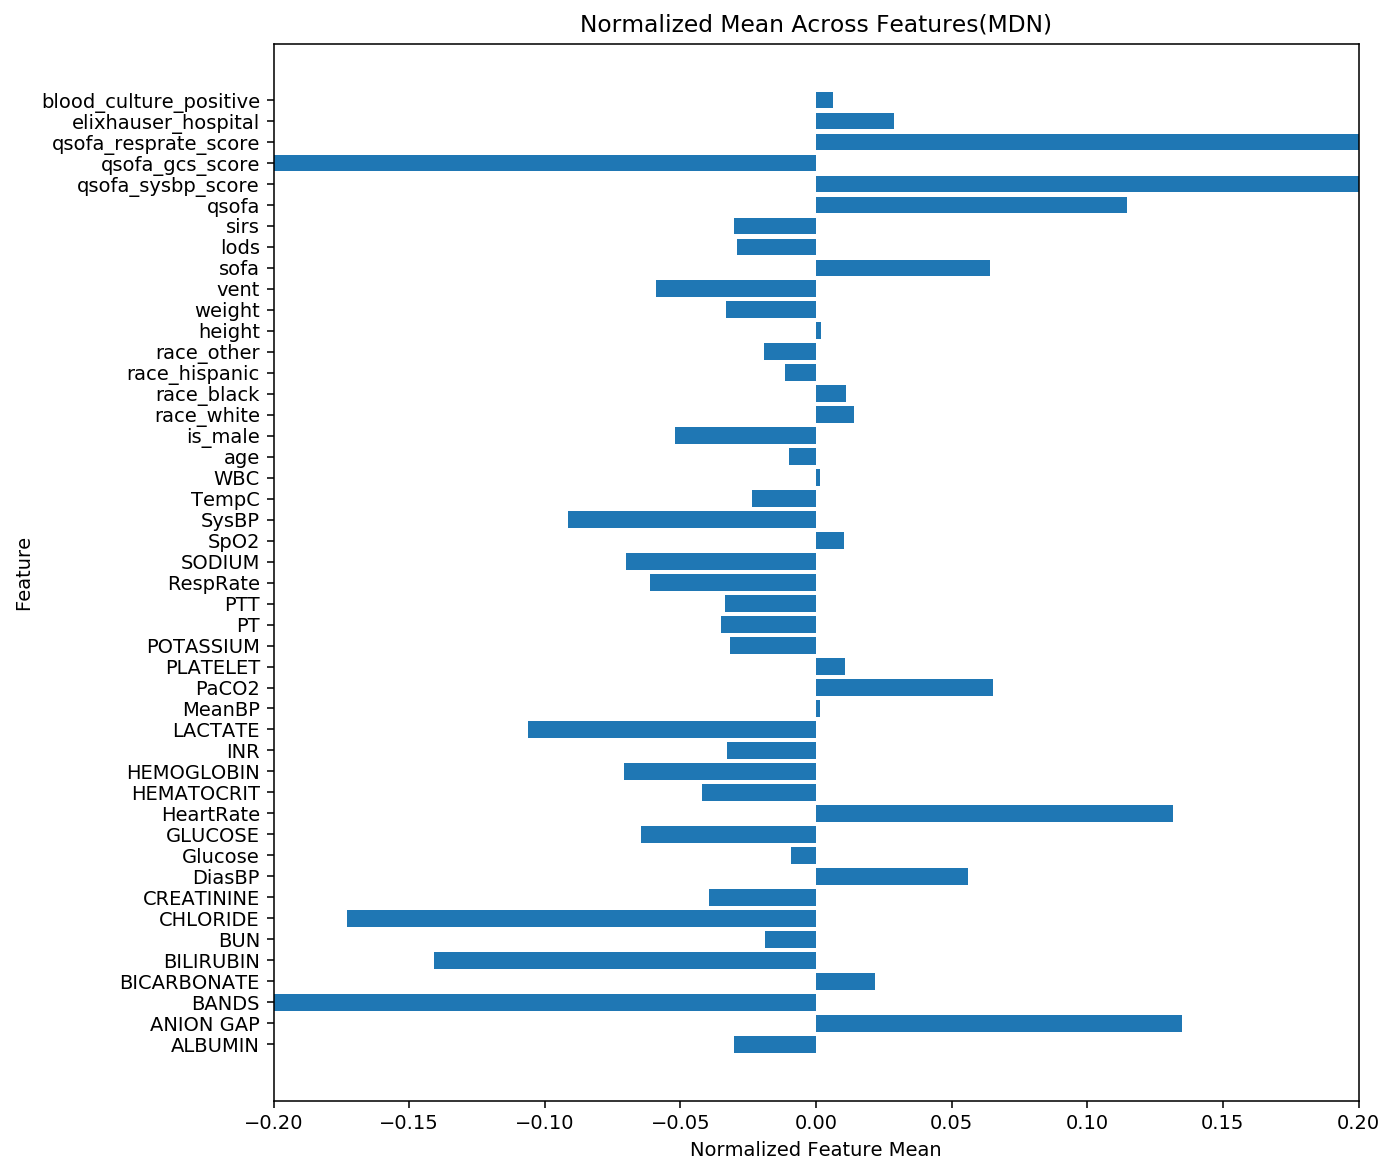

In [48]:
normalized_squared_sums = simulated_episode_mdn_mean
labels = [x for _,x in zip(normalized_squared_sums, columns)]
pos = np.arange(len(labels))
plt.figure(num=None, figsize=(10, 10), dpi=140)
plt.barh(width=normalized_squared_sums, y=pos)
plt.yticks(pos, labels)
plt.xlabel('Normalized Feature Mean')
plt.xlim(-.2, .2)
plt.ylabel('Feature')
plt.title('Normalized Mean Across Features(MDN)')

Text(0.5, 1.0, "Length of Episdoes Using Physician's Policy in Real World")

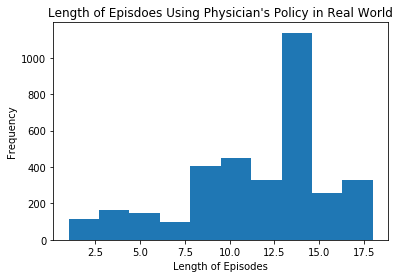

In [23]:
plt.hist(episodes.count()["race_black"].values)
plt.xlabel('Length of Episodes')
plt.ylabel('Frequency')
plt.title('Length of Episdoes Using Physician\'s Policy in Real World')

In [ ]:
 twe